In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [2]:
def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height


In [3]:
r = 0.2

node_coord = 10
angles = np.linspace(0, 2 * np.pi, 50)
half_angles = np.linspace(0, np.pi, 25)

top_left_xs = r * np.cos(angles) - node_coord
top_left_ys = r * np.sin(angles) + node_coord

top_right_xs = r * np.cos(angles) + node_coord
top_right_ys = r * np.sin(angles) + node_coord

middle_xs = np.zeros(27)
middle_ys = np.zeros(27)

middle_xs[0] = r
middle_xs[1:-1] = r * np.cos(half_angles)
middle_xs[-1] = -r

middle_ys[0] = 15
middle_ys[1:-1] = r * np.sin(-half_angles) + 1
middle_ys[-1] = 15

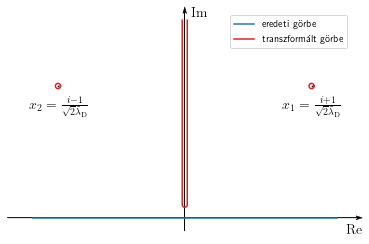

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

# draw x and y axis
ax.arrow(-14, 0, 28., 0., fc='k', ec='k', lw=0.5, 
         head_width=0.3, head_length=0.5, overhang=0.3, 
         length_includes_head=True, clip_on=False) 

ax.arrow(0, -1, 0., 17, fc='k', ec='k', lw=0.5, 
         head_width=0.3, head_length=0.5, overhang=0.3, 
         length_includes_head=True, clip_on=False)

plt.plot([-12, 12], [0, 0], color='tab:blue', label='eredeti görbe')

plt.plot(top_left_xs, top_left_ys, color='tab:red')
plt.plot(top_right_xs, top_right_ys, color='tab:red')
plt.plot(middle_xs, middle_ys, color='tab:red', label='transzformált görbe')

plt.scatter([-node_coord, node_coord], [node_coord, node_coord], color='black', s=0.5)

plt.legend()
ax.text(-node_coord, node_coord - 1, r'$x_2 = \frac{i - 1}{\sqrt{2} \tilde{\lambda}_\mathrm{D}}$', fontsize=14,
        verticalalignment='top', horizontalalignment='center')
ax.text(node_coord, node_coord - 1, r'$x_1 = \frac{i + 1}{\sqrt{2} \tilde{\lambda}_\mathrm{D}}$', fontsize=14,
        verticalalignment='top', horizontalalignment='center')
ax.text(14, -0.5, r'$\mathrm{Re}$', fontsize=14,
        verticalalignment='top', horizontalalignment='right')
ax.text(0.5, 16, r'$\mathrm{Im}$', fontsize=14,
        verticalalignment='top', horizontalalignment='left')

plt.savefig("integral_curve.pdf", format="pdf", bbox_inches="tight")
plt.show()

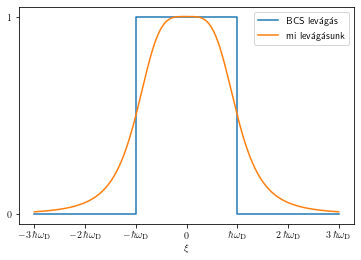

In [24]:
left = -300
right = 300
bcs = np.zeros((6, 2))
bcs[0,:] = [ left, 0 ]
bcs[1,:] = [ -100, 0 ]
bcs[2,:] = [ -100, 1 ]
bcs[3,:] = [ 100, 1 ]
bcs[4,:] = [ 100, 0 ]
bcs[5,:] = [ right, 0 ]

xs = np.linspace(left, right, 500)
ys = 1 / ((l0 * xs)**4 + 1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(bcs[:,0], bcs[:,1], label='BCS levágás')
plt.plot(xs, ys, label='mi levágásunk')
plt.xlabel(r'$\xi$')
plt.legend()

ax.set_xticks([ -300, -200, -100, 0, 100, 200, 300 ])
ax.set_xticklabels([
    r'$-3 \, \hbar \omega_{\mathrm{D}}$',
    r'$-2 \, \hbar \omega_{\mathrm{D}}$',
    r'$-\hbar \omega_{\mathrm{D}}$',
    '$0$',
    r'$\hbar \omega_{\mathrm{D}}$',
    r'$2 \, \hbar \omega_{\mathrm{D}}$',
    r'$3 \, \hbar \omega_{\mathrm{D}}$',
])
ax.set_yticks([ 0, 1 ])

plt.savefig("cutoff.pdf", format="pdf", bbox_inches="tight")
plt.show()